# U.S. Medical Insurance Costs

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
#underweight <=18.5, normal >18.5, <=25, overweight >25, <=30, obese >30

df.loc[(df.bmi <= 18.5), 'classification'] = 'underweight'
df.loc[(df.bmi >18.5) & (df.bmi <=25), 'classification'] = 'normal'
df.loc[((df.bmi > 25) & (df.bmi <30)), 'classification'] = 'overweight'
df.loc[(df.bmi >= 30), 'classification'] = 'obese'

print(df.head())

   age     sex     bmi  children smoker     region      charges classification
0   19  female  27.900         0    yes  southwest  16884.92400     overweight
1   18    male  33.770         1     no  southeast   1725.55230          obese
2   28    male  33.000         3     no  southeast   4449.46200          obese
3   33    male  22.705         0     no  northwest  21984.47061         normal
4   32    male  28.880         0     no  northwest   3866.85520     overweight


In [5]:
grouped_class = df.groupby(by='classification').sex.count()

print(grouped_class)



classification
normal         226
obese          707
overweight     384
underweight     21
Name: sex, dtype: int64


<AxesSubplot:xlabel='classification'>

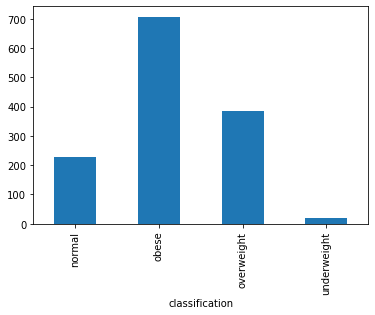

In [6]:
grouped_class.plot.bar()

In [7]:
total_rows = df.count

print(total_rows)

class_list = grouped_class.values.tolist()

print(class_list)

df2 = pd.DataFrame(class_list, columns=['Classification Count'])

print(df2)

<bound method DataFrame.count of       age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     classification  
0        overweight  
1             obese  
2             obese  
3            normal  
4        overwei

In [8]:
df2['Classification Percentage'] = ((df2['Classification Count'])/(1338/100))

print(df2)

   Classification Count  Classification Percentage
0                   226                  16.890882
1                   707                  52.840060
2                   384                  28.699552
3                    21                   1.569507


In [9]:
classifications = grouped_class.index.tolist()

In [10]:
print(classifications)

['normal', 'obese', 'overweight', 'underweight']


In [11]:
df2['Classification'] = classifications

print(df2)

   Classification Count  Classification Percentage Classification
0                   226                  16.890882         normal
1                   707                  52.840060          obese
2                   384                  28.699552     overweight
3                    21                   1.569507    underweight


<AxesSubplot:xlabel='Classification'>

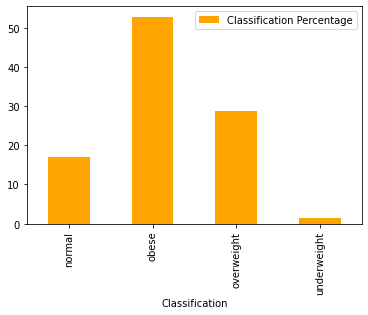

In [14]:
df2.plot.bar(x='Classification',y='Classification Percentage', color='orange')

In [15]:
mean_cost_bmi = df.groupby(by='classification').charges.mean()

In [16]:
print(mean_cost_bmi)

classification
normal         10435.440719
obese          15552.335469
overweight     10989.854630
underweight     8657.620652
Name: charges, dtype: float64


In [18]:
mean_cost = df['charges'].mean()
print(mean_cost)

13270.422265141257


In [20]:
bmi_grouped = df.groupby(by='bmi').charges.mean()
print(bmi_grouped)

#need a method that is less granular. Round to the nearest integer?

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64
